In [7]:
import json
import tiktoken
from pathlib import Path

In [2]:
tiktoken.list_encoding_names()

['gpt2', 'r50k_base', 'p50k_base', 'p50k_edit', 'cl100k_base', 'o200k_base']

In [3]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [4]:
total_tokens = 0
for path in Path('./data/companies').iterdir():
    if path.suffix == ".txt":
        with open(path) as file:
            tokens = num_tokens_from_string(file.read(), "o200k_base")
            total_tokens += tokens
            print(f'{path.name}: {tokens}')
print(f'{total_tokens=}')

argo-team.txt: 1509
blue-horizon-energy.txt: 1580
neonbyte-interactive.txt: 2106
quantum-forge-technologies.txt: 2108
city-solve.txt: 3826
vertex-medtech.txt: 1520
nova-drive-motors.txt: 2757
ukraine-boats.txt: 3793
aero-vance-aviation.txt: 1860
total_tokens=21059


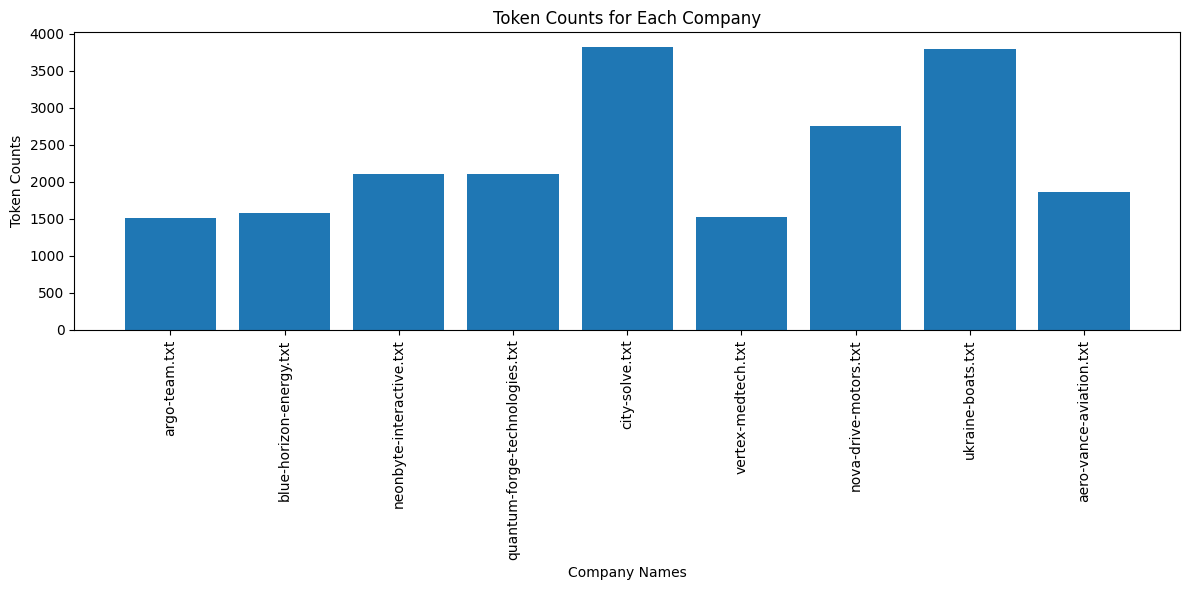

In [6]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
company_names = []
token_counts = []

for path in Path('./data/companies').iterdir():
    if path.suffix == ".txt":
        with open(path) as file:
            tokens = num_tokens_from_string(file.read(), "o200k_base")
            company_names.append(path.name)
            token_counts.append(tokens)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(company_names, token_counts)
plt.xlabel("Company Names")
plt.ylabel("Token Counts")
plt.title("Token Counts for Each Company")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [15]:
from collections import defaultdict

data = json.load(open('./data/q&a.json'))

questions = defaultdict(int)
for item in data:
    questions[item['src']] += 1
questions

defaultdict(int,
            {'neonbyte-interactive': 16,
             'vertex-medtech': 13,
             'blue-horizon-energy': 5,
             'quantum-forge-technologies': 7,
             'agro-team-inc': 6,
             'ukraine-boats-inc': 3})

In [10]:
company_names

['argo-team.txt',
 'blue-horizon-energy.txt',
 'neonbyte-interactive.txt',
 'quantum-forge-technologies.txt',
 'city-solve.txt',
 'vertex-medtech.txt',
 'nova-drive-motors.txt',
 'ukraine-boats.txt',
 'aero-vance-aviation.txt']

In [19]:
full_question_counts = [15, 20, 25, 20, 0, 20, 0, 10, 0]
selected_question_counts = [6, 5, 16, 7, 0, 13, 0, 3, 0]

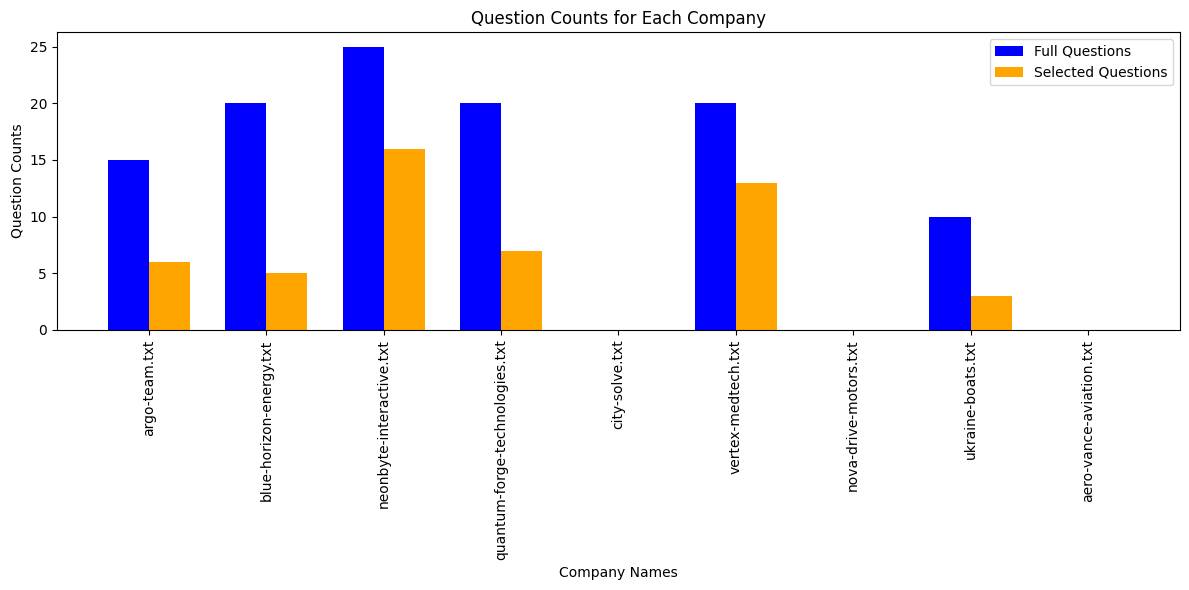

In [20]:
import numpy as np

# Data for the chart
bar_width = 0.35  # Width of the bars

# Set up positions for the bars on the x-axis
r1 = np.arange(len(company_names))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.figure(figsize=(12, 6))

# Make the bars
plt.bar(r1, full_question_counts, color='blue', width=bar_width, label='Full Questions')
plt.bar(r2, selected_question_counts, color='orange', width=bar_width, label='Selected Questions')

# Add xticks on the middle of the group bars
plt.xlabel("Company Names")
plt.ylabel("Question Counts")
plt.title("Question Counts for Each Company")
plt.xticks([r + bar_width/2 for r in range(len(company_names))], company_names, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()